In [2]:
%load_ext rmagic

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


In [17]:
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = 16, 12

In [9]:
%%R 
library('forecast')
library('stats')

In [10]:
import rpy2.robjects as robjects

In [11]:
robjects.r('''
        filename <- "../data/01_zilina_suma.csv"
        symbol_length <- 96
        step <- 48
        week <- symbol_length * 7
        data = read.csv(filename, header = TRUE)
        start_date <- strptime(data$DATUM[1], "%d/%m/%Y")
        end_date <- strptime(data$DATUM[length(data$DATUM)], "%d/%m/%Y")
        series <- ts(data$SUM_of_MNOZSTVO, start=as.numeric(start_date), frequency=96)
        ''')

<FloatVector - Python:0x7f01bcf383b0 / R:0x55f4020>
[21674.275309, 21819.158939, 21577.701649, ..., 38599.422975, 38293.983325, 38359.251877]

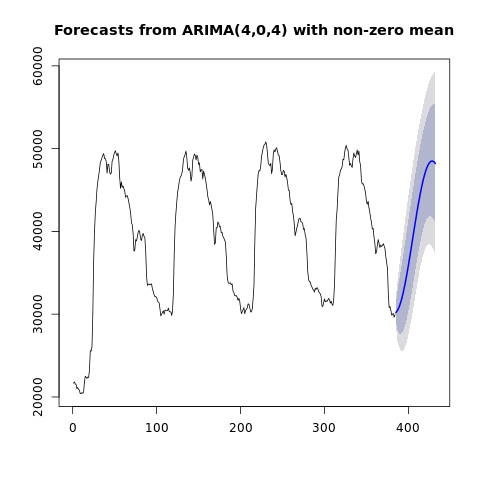

In [12]:
%%R
y <- series[1:(4*96)]
fit=Arima(y,order=c(4,0,4), seasonal=c(96,96*7),include.drift=FALSE)
fc <- forecast(fit, h=48)
plot(fc)

In [106]:
%%R
sample <- series[1:(20*7*96)]

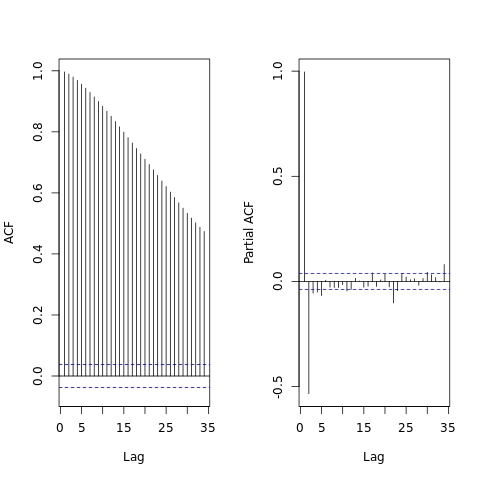

In [41]:
%%R
par(mfrow=c(1,2))
Acf(sample,main="")
Pacf(sample,main="")

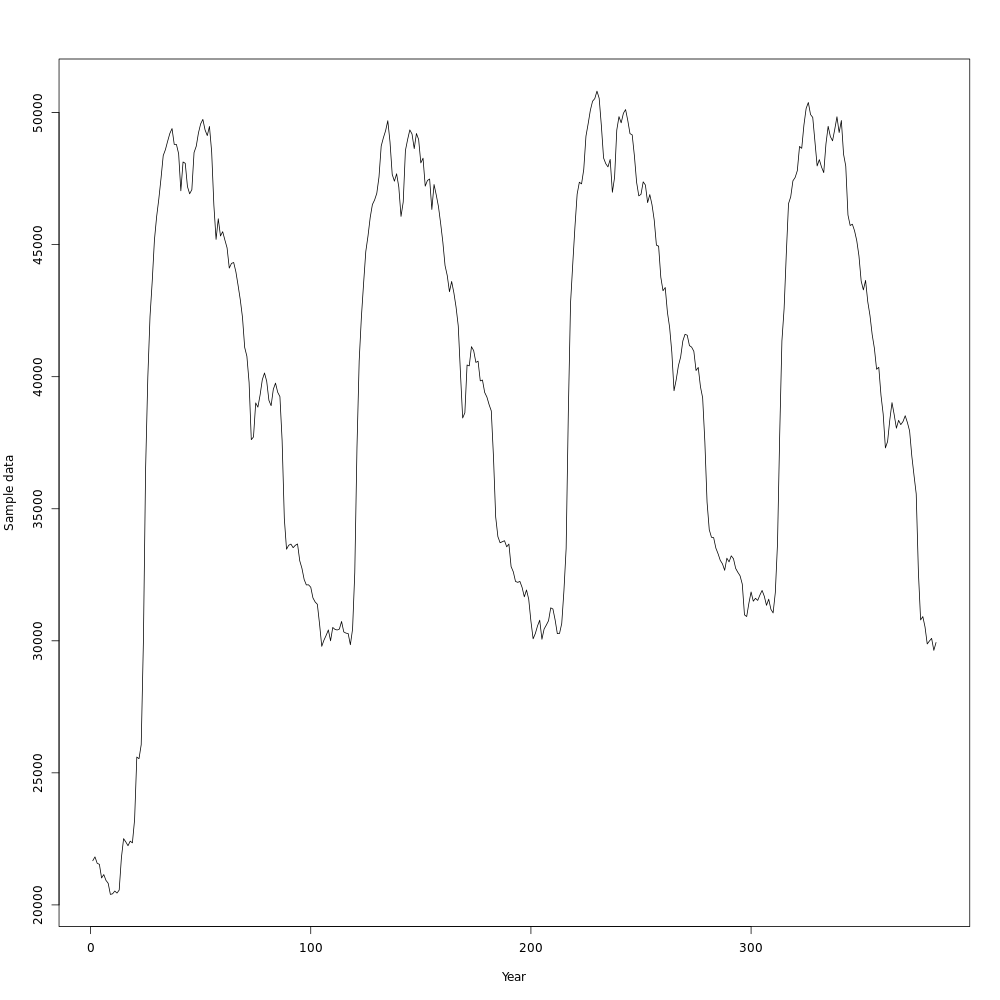

In [70]:
%%R  -w 1000 -h 1000 -u px
plot(sample, ylab="Sample data", xlab="Year", type='l')

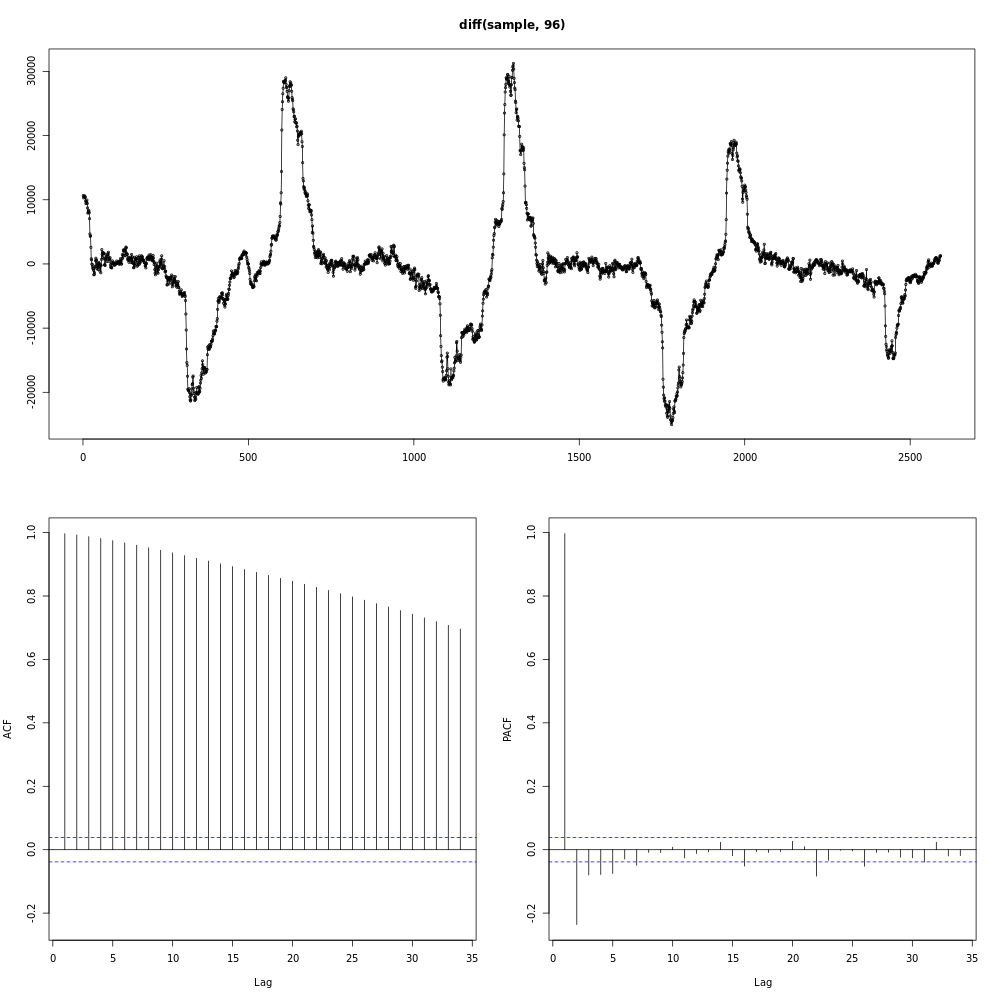

In [43]:
%%R  -w 1000 -h 1000 -u px
tsdisplay(diff(sample,96))

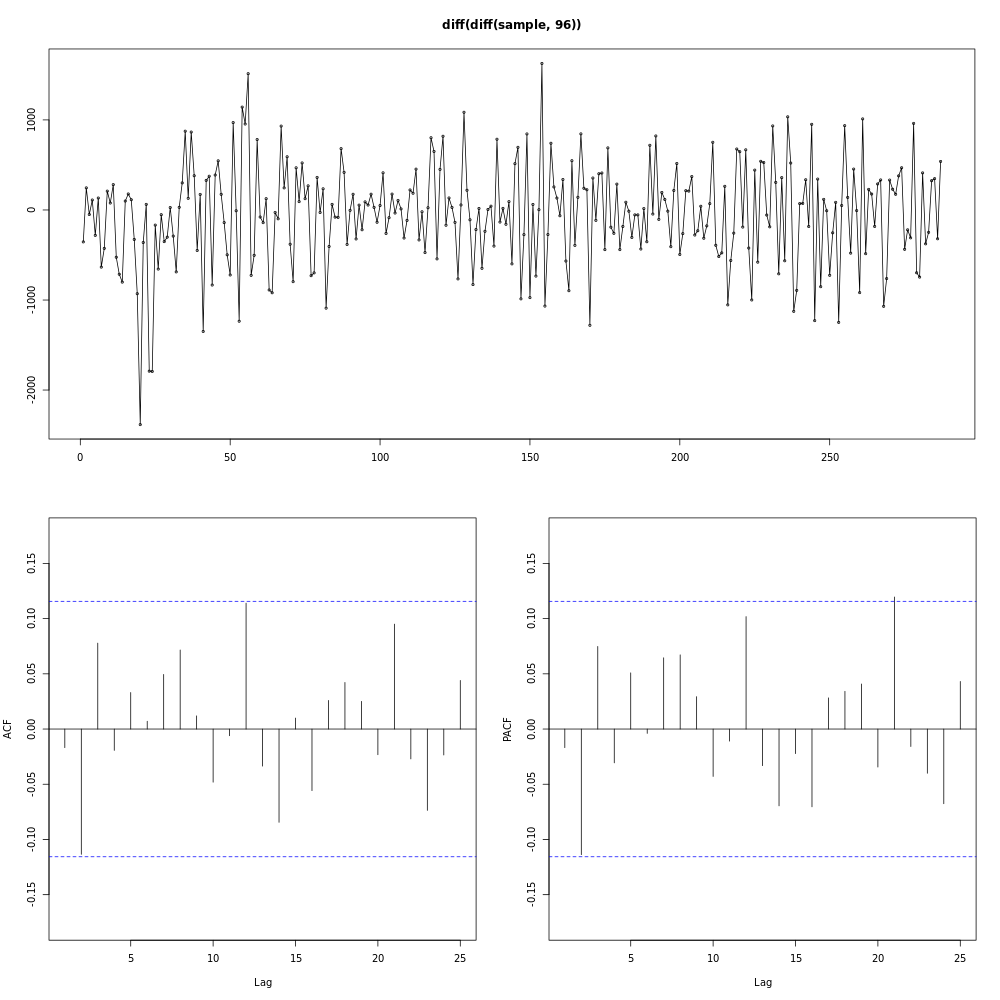

In [72]:
%%R  -w 1000 -h 1000 -u px
tsdisplay(diff(diff(sample,96)))

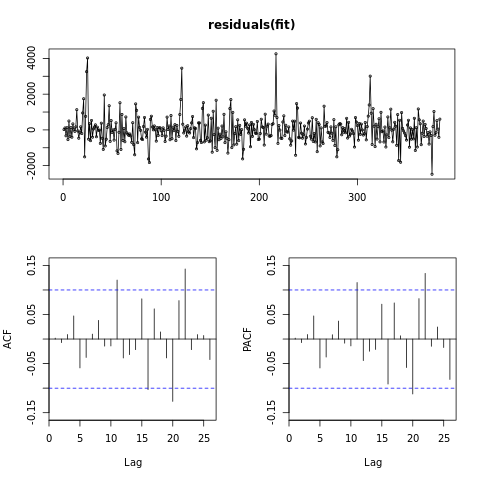

In [76]:
%%R
fit <- Arima(sample, order=c(1,1,3), seasonal=c(0,1,1))
tsdisplay(residuals(fit))

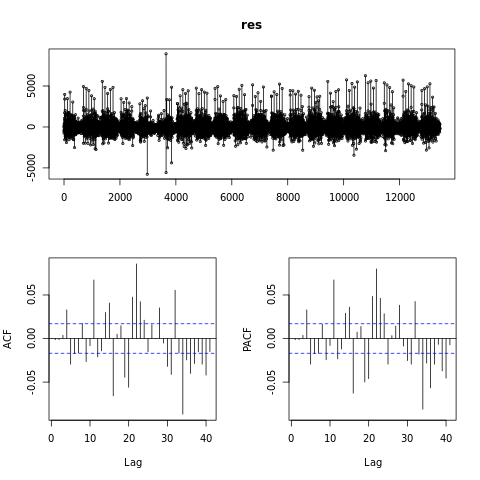

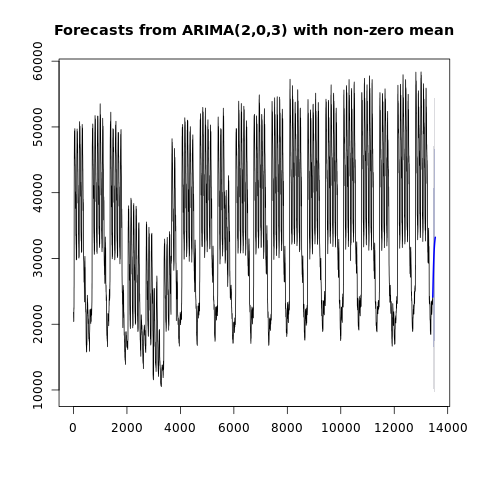

In [155]:
%%R
fit3 <- Arima(sample, order=c(2,0,3))#, seasonal=c(1,0,1))
res <- residuals(fit3)
tsdisplay(res)
Box.test(res, lag=192, fitdf=96, type="Ljung")
plot(forecast(fit3, h=96))

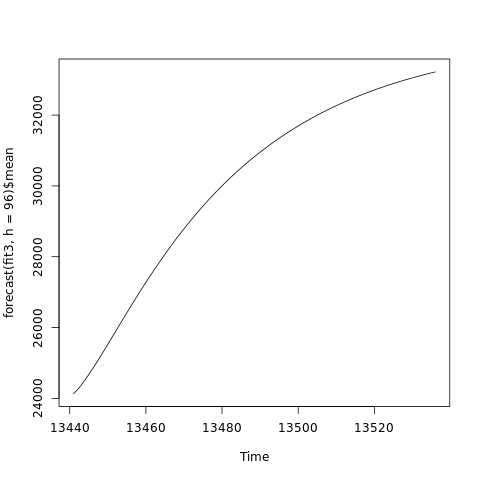

In [156]:
%%R
plot(forecast(fit3, h=96)$mean)

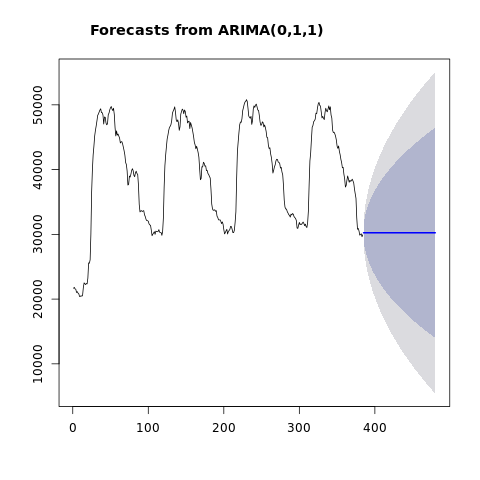

In [91]:
%%R
plot(forecast(fit3, h=96))

In [130]:
%%R
auto.arima(sample, stepwise=FALSE, approximation=FALSE)
#auto.arima(sample)

Series: sample 
ARIMA(4,1,1) with drift         

Coefficients:
         ar1     ar2     ar3     ar4     ma1    drift
      0.1155  0.2624  0.0176  0.0980  0.5061   0.2868
s.e.  0.0954  0.0599  0.0091  0.0094  0.0957  18.2950

sigma^2 estimated as 508659:  log likelihood=-107352
AIC=214718   AICc=214718   BIC=214770.5


[1] 840
[1] 13440


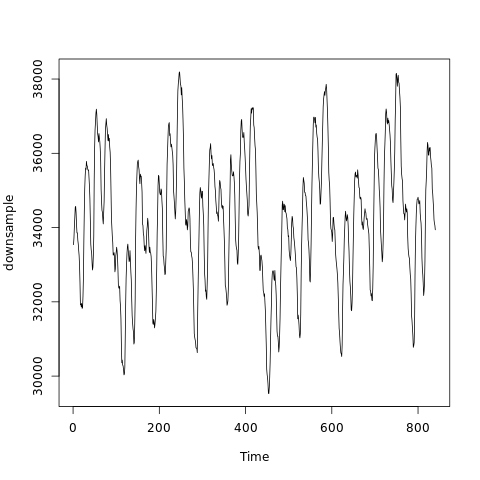

In [119]:
%%R
part <- series[1:(20*7*96)]
ncol <- 16
period <- 96/ncol
pom <- matrix(part, ncol=16)
downsample <- apply(pom, 1, mean)
plot.ts(downsample)
print(length(downsample))
length(part)

In [165]:
%%R
auto.arima(downsample, lambda=0, d=0, D=1, max.order=9,
                stepwise=FALSE, approximation=FALSE, allowdrift=TRUE)

Series: downsample 
ARIMA(3,0,5) with non-zero mean 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1     ar2      ar3     ma1     ma2     ma3     ma4     ma5
      0.8021  0.7360  -0.6177  0.9069  0.0765  0.0669  0.1512  0.1483
s.e.  0.0839  0.1077   0.0717  0.0884  0.1078  0.0865  0.0646  0.0367
      intercept
        10.4391
s.e.     0.0068

sigma^2 estimated as 4.538e-05:  log likelihood=3005.75
AIC=-5991.51   AICc=-5991.24   BIC=-5944.17


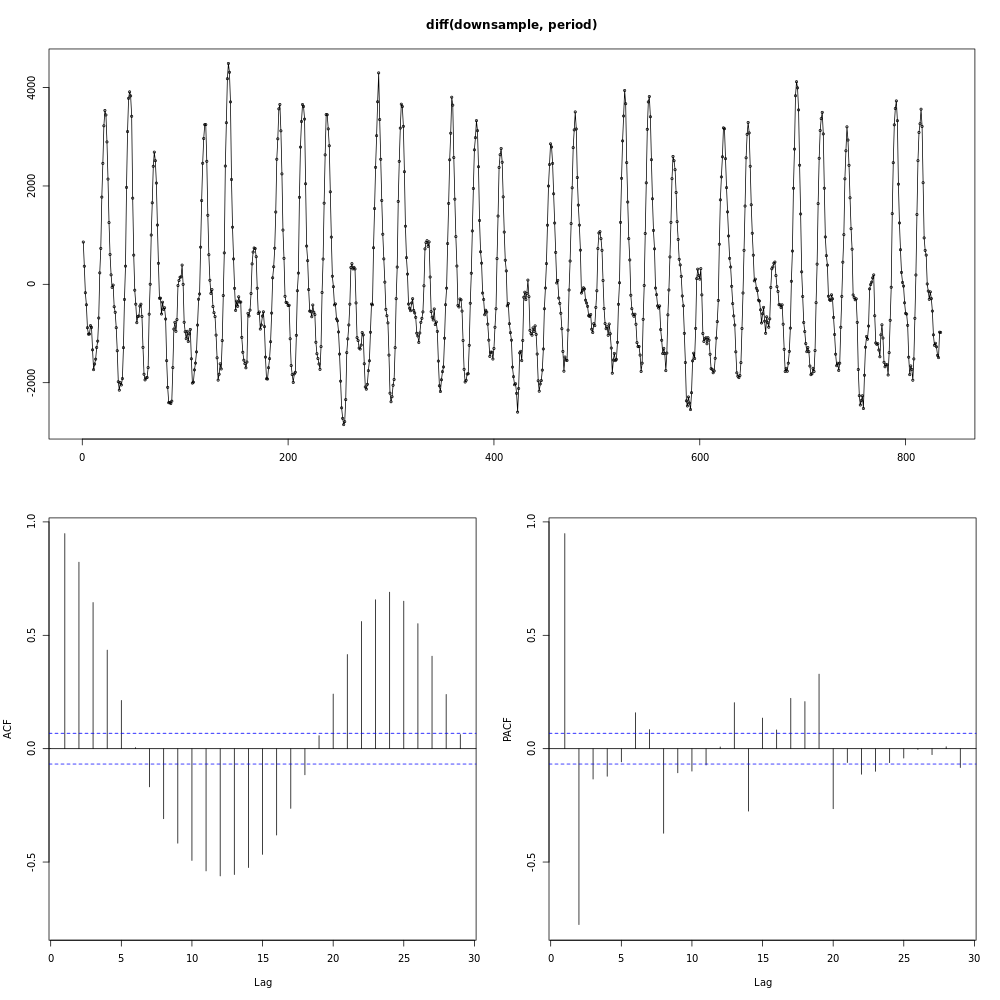

In [158]:
%%R  -w 1000 -h 1000 -u px
tsdisplay(diff(downsample,period),)

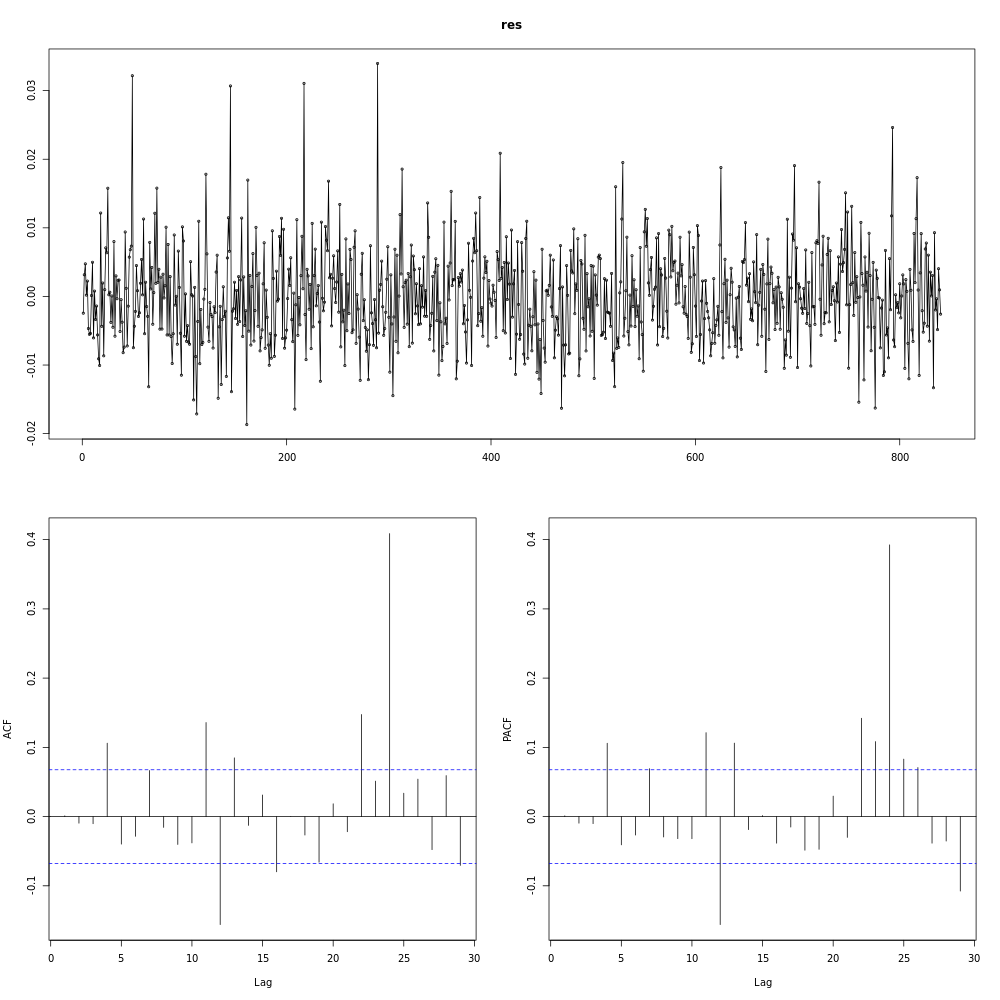

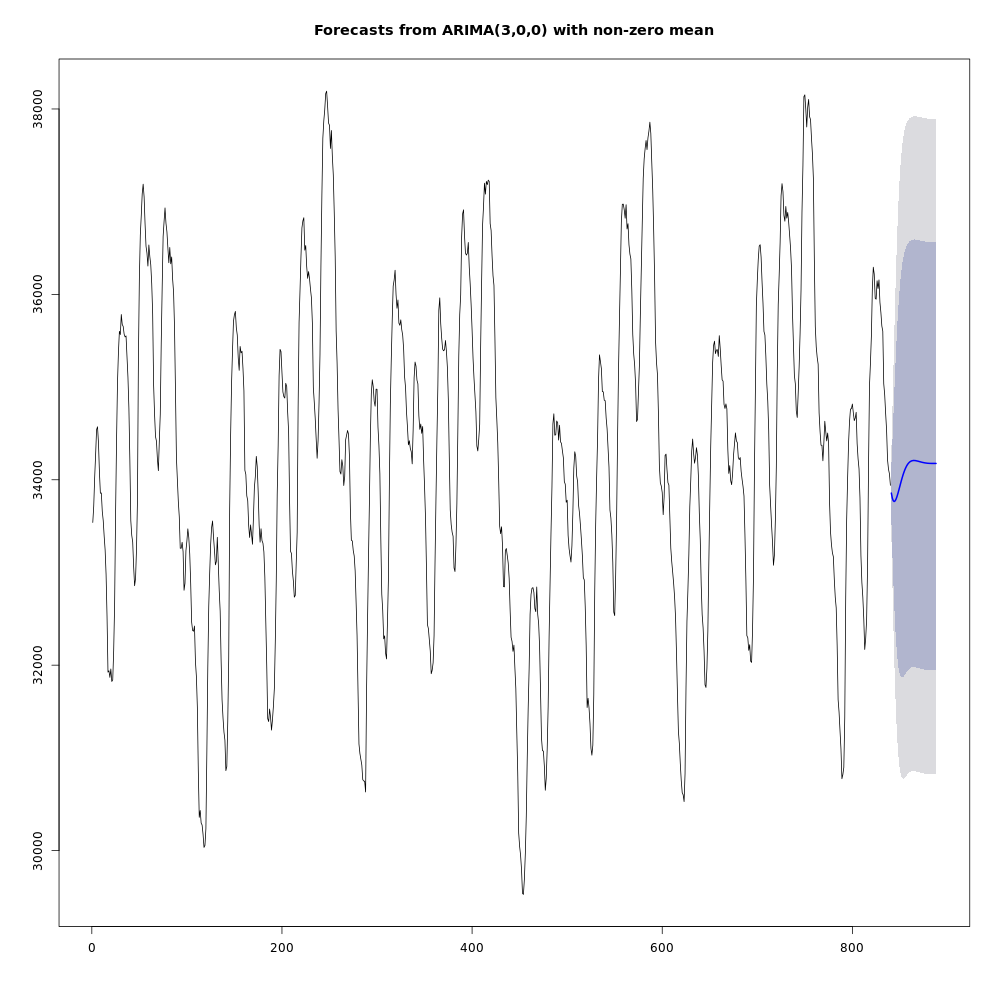

In [160]:
%%R  -w 1000 -h 1000 -u px
fit3 <- Arima(downsample, order=c(3,0,0), seasonal=c(2,0,1), lambda=0)
res <- residuals(fit3)
tsdisplay(res)
Box.test(res, lag=(period*2), fitdf=period, type="Ljung")
plot(forecast(fit3, h=(period*8)))

In [129]:
%%R
auto.arima(downsample, stepwise=FALSE, approximation=FALSE)
#auto.arima(downsample)

Series: downsample 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2   intercept
      1.7227  -0.7571  34218.6064
s.e.  0.0224   0.0224    229.4139

sigma^2 estimated as 53148:  log likelihood=-5764.33
AIC=11536.67   AICc=11536.71   BIC=11555.6


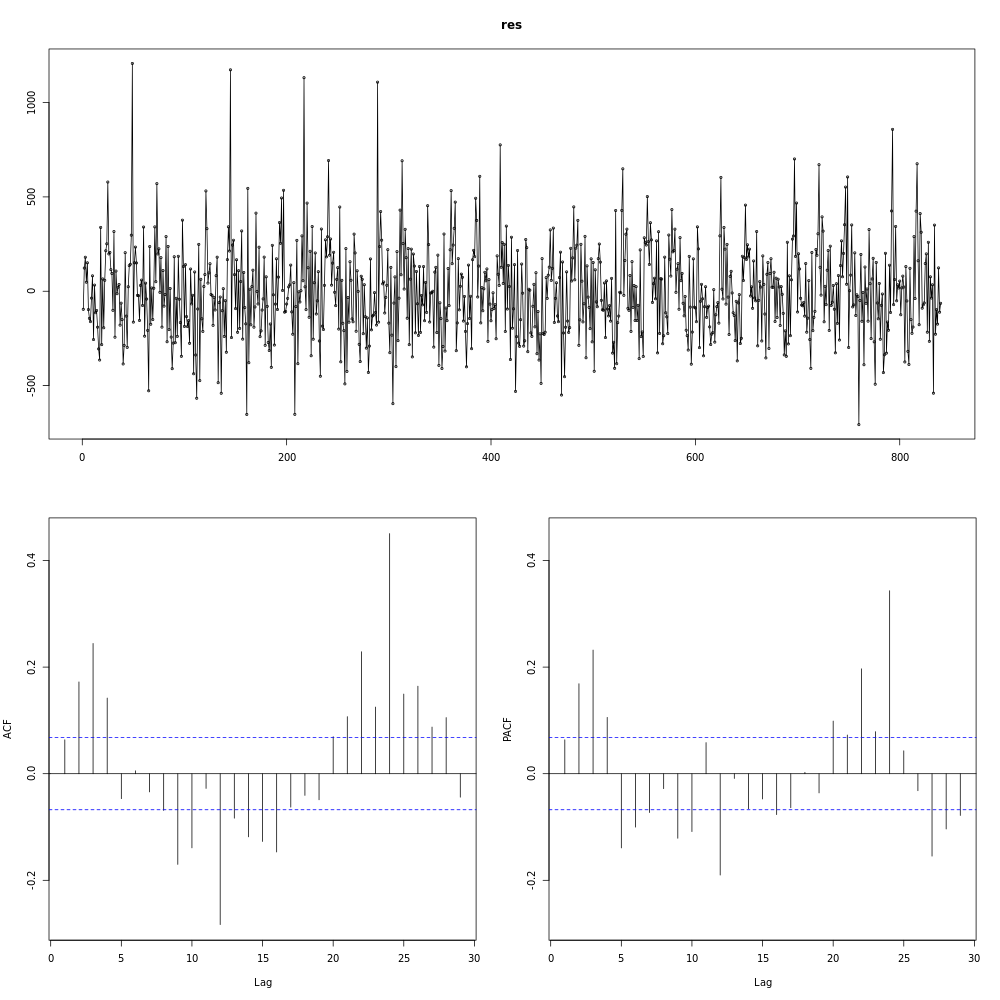

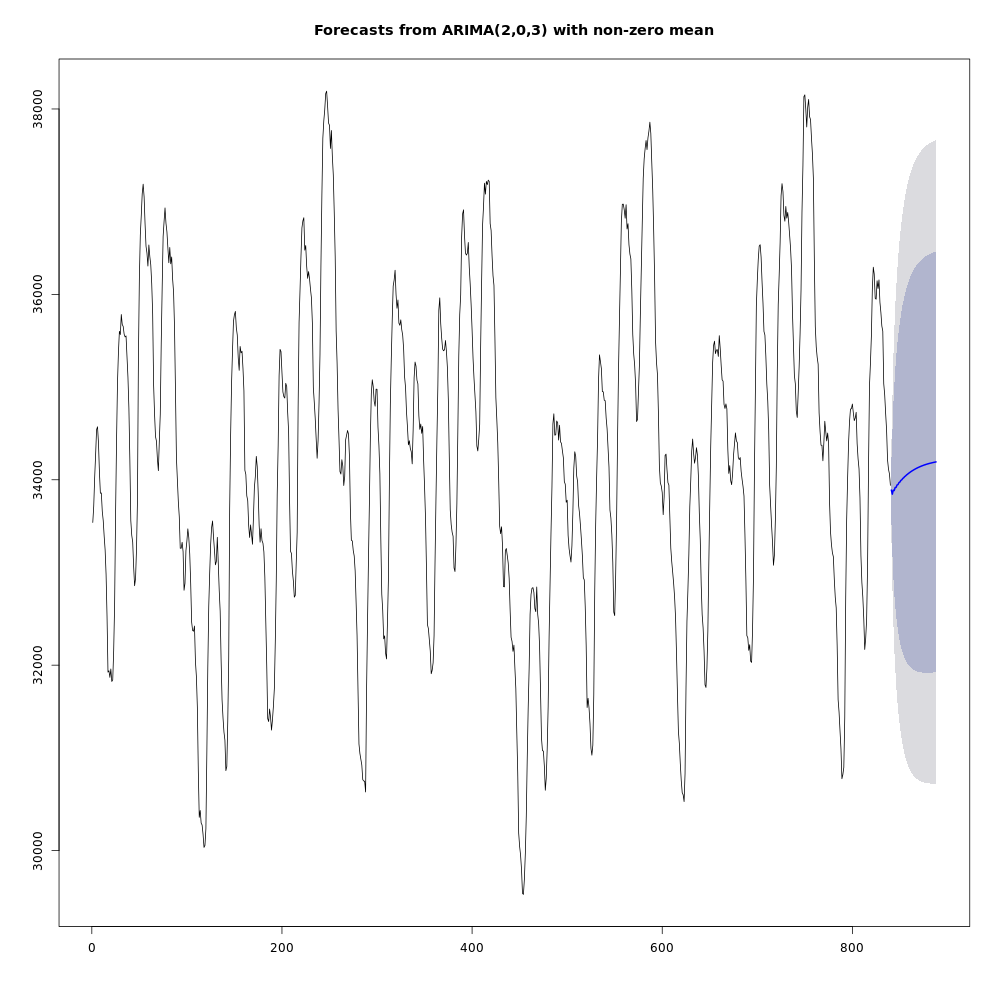

In [124]:
%%R  -w 1000 -h 1000 -u px
fit3 <- Arima(downsample, order=c(2,0,3))#, seasonal=c(1,0,1))
res <- residuals(fit3)
tsdisplay(res)
Box.test(res, lag=(period*2), fitdf=period, type="Ljung")
plot(forecast(fit3, h=(period*8)))

In [125]:
%%R
library(fpp)

Loading required package: fma
Loading required package: tseries

    ‘tseries’ version: 0.10-34

    ‘tseries’ is a package for time series analysis and computational
    finance.

    See ‘library(help="tseries")’ for details.

Loading required package: expsmooth
Loading required package: lmtest


Series: euretail 
ARIMA(0,1,3)(0,1,1)[4]                    

Coefficients:
         ma1     ma2     ma3     sma1
      0.2625  0.3697  0.4194  -0.6615
s.e.  0.1239  0.1260  0.1296   0.1555

sigma^2 estimated as 0.1451:  log likelihood=-28.7
AIC=67.4   AICc=68.53   BIC=77.78


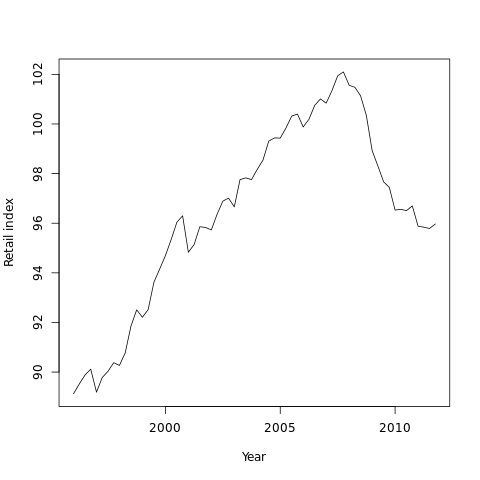

In [128]:
%%R
plot(euretail, ylab="Retail index", xlab="Year")
auto.arima(euretail, stepwise=FALSE, approximation=FALSE)